# COMP 7150 Assignment 2
Due date: Monday 02/26/2024, before midnight

**YOUR NAME**: Nitya Kanthi Nadimpalli

----

Notes: a focus of this assignment is on your "judgement" or interpretation of questions and goals.  

I do not tell you specifically which technical procedure(s) to use.  Instead, you will have to interpret the questions, choose the technical procedure(s), and explain your interpretation, and why you make such technical choices.

I may not even tell you everything you need to do.  But based on what we've discussed in class, you must choose technical procedures appropriately to demonstrate your understanding.

It is insufficient (you won't get full credits) to simply show the code. You need to demonstrate understanding by explaining your interpretations and technical choices.

---
**Problem 1**

Does smoking status appear to influence tipping (tip percentage) behavior?

Do the comparison numerically and visually.  For visual comparison, use both catplot and displot.

### Answer:

+ Yes, the smoking status influences the tipping behavior as we can observe it both numerically and visually that the average smoker tips more compared to a non-smoker

In [18]:
import warnings 
warnings.filterwarnings('ignore')
import pandas
tips = pandas.read_csv('../Data_sets/tips.csv')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
154,19.77,2.00,Male,No,Sun,Dinner,4
169,10.63,2.00,Female,Yes,Sat,Dinner,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
16,10.33,1.67,Female,No,Sun,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5


In [19]:
tips['tip_per'] = ((tips['tip']/tips['total_bill'])*100)
data=(tips['tip_per']> tips['tip_per'].mean())
info = tips.groupby('smoker')['tip_per'].describe()
info

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,15.932846,3.990977,5.679667,13.690561,15.562472,18.501403,29.198966
Yes,93.0,16.319604,8.511920,3.563814,10.677083,15.384615,19.505852,71.034483


In [20]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn

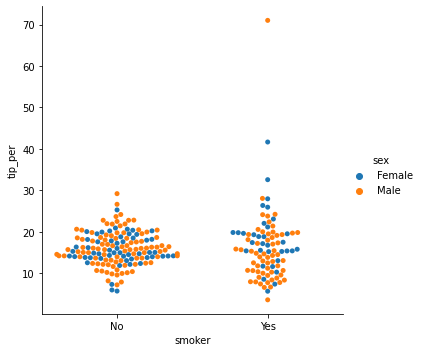

In [21]:
seaborn.catplot(data=tips, x='smoker', y='tip_per', kind="swarm", hue = 'sex', height = 5)

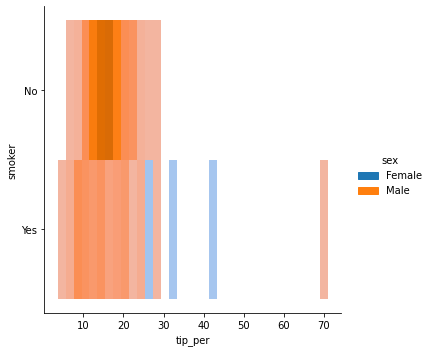

In [103]:
seaborn.displot(data=tips, x='tip_per', y='smoker', hue='sex', height = 5)

---
**Problem 2**

Does smoking status appear to influence the relationship between total bill and tip?


Do the comparison visually with both catplot and displot.
 

### Answer:

+ As we can observe that the average smoking status of a person is paying more total bill and tip compared to non-smoker

In [110]:
info = tips.groupby('smoker')['total_bill'].describe()
info

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33
Yes,93.0,20.756344,9.832154,3.07,13.420,17.92,26.860,50.81


In [111]:
info = tips.groupby('smoker')['tip'].describe()
info

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


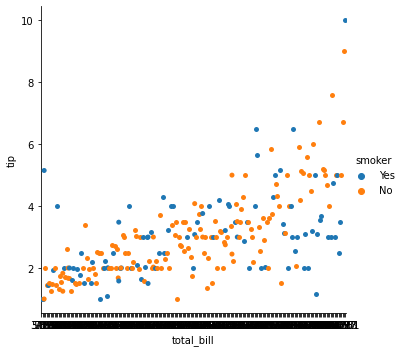

In [109]:
seaborn.catplot(data=tips, x='total_bill', y='tip', kind='swarm', hue='smoker', height = 5)

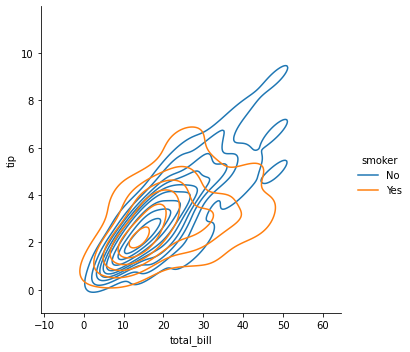

In [107]:
seaborn.displot(data=tips, x='total_bill', y='tip', kind='kde', hue='smoker', height = 5)

---
**Problem 3**

Determine if the tip percentage is distributed normally. Include in your analysis (i) a visualization the distribution of the data, (ii) a numerical statistical test, and (iii) visual statistical test.


### Answer:

1. By observing the histogram, the visual suggests that the distribution is not symmetrical.

2. The numerical statistical test says that the Shapiro-Wilk test results in a statistic of 0.7994 and p-value id 0.0 which makes us to reject the null hypothesis that the data does not give a normal distribution.

3. The qq-plot is against the normal distribution.

### 1

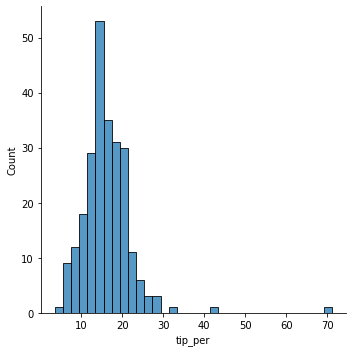

In [113]:
seaborn.displot(data=tips, x='tip_per', kind='hist', height = 5)

### 2

In [114]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    shapiro_test = shapiro(data)
    fig = qqplot(data, line='s')
    return round(shapiro_test.statistic,4)

0.7994

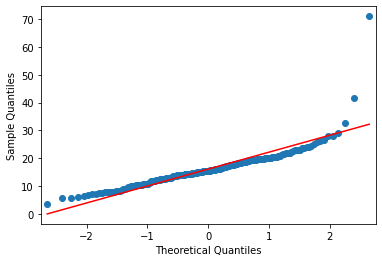

In [47]:
test_for_normality(tips['tip_per'])

In [49]:
from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(tips['tip_per'])
print(round(test_pvalue,4))

0.0


### 3

In [53]:
from numpy.random import normal
theoretical = normal(tips['tip_per'].mean(), tips['tip_per'].std(), 500)

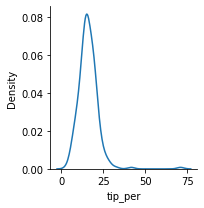

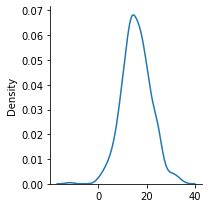

In [54]:
from seaborn import displot
displot(data=tips, x='tip_per', kind='kde', height=3)
displot(x=theoretical, kind='kde', height=3)

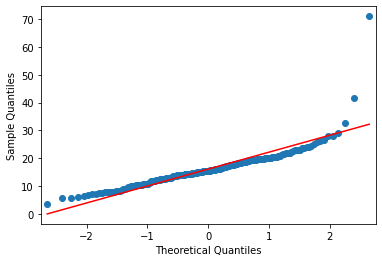

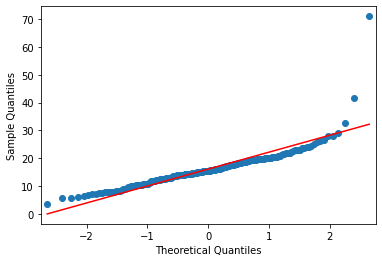

In [56]:
from statsmodels.api import qqplot
qqplot(tips['tip_per'], line='s')

---
**Problem 4**

Determine if the tip percentage is distributed normally during lunch time, and dinner time. Include in your analysis (i) a visualization the distribution of the data, (ii) a numerical statistical test, and (iii) visual statistical test.


### Answer:

1. The Lunchtime tip appears to be distributed uniformly and closer to normal than dinner tips.

2. The lunchtime and dinner time get statistics of 0.98 & 0.77, respectively, and the p-values are 0.48 & 0.38, respectively, which we reject the null hypothesis of normality for dinner tips.

3. In qq-plot the lunch gives more closely with theoretical while the plot for dinner deviates from lines. We can say that the Shapiro-Wilk test indicates non-normality

### 1

In [57]:
lunch=tips[tips['time']=='Lunch']['tip_per']

In [58]:
dinner=tips[tips['time']=='Dinner']['tip_per']

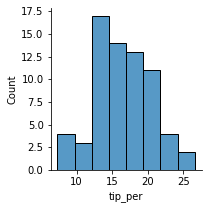

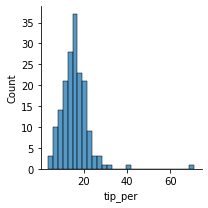

In [59]:
seaborn.displot(data=lunch, height=3)
seaborn.displot(data=dinner, height=3)

### 2

In [73]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    shapiro_test = shapiro(lunch)
    fig = qqplot(lunch, line='s')
    return round(shapiro_test.statistic,4)

0.9831

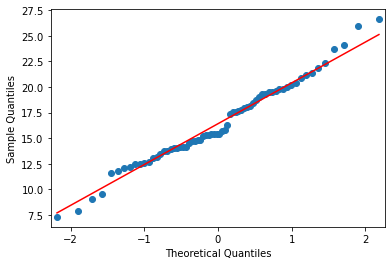

In [74]:
test_for_normality(tips['time'])

In [75]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    shapiro_test = shapiro(dinner)
    fig = qqplot(dinner, line='s')
    return round(shapiro_test.statistic,4)

0.7753

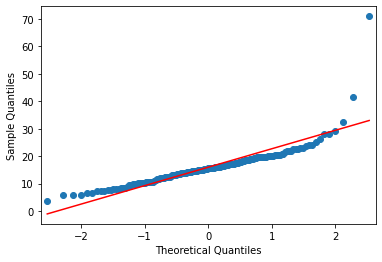

In [76]:
test_for_normality(tips['time'])

In [77]:
from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(lunch)
print(round(test_pvalue,4))

from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(dinner)
print(round(test_pvalue,4))

0.4852
0.0


### 3

In [78]:
from numpy.random import normal
theoretical_l = normal(lunch.mean(), lunch.std(), 500)

from numpy.random import normal
theoretical_d = normal(dinner.mean(), dinner.std(), 500)

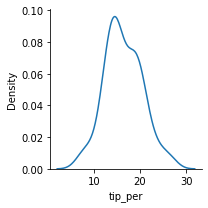

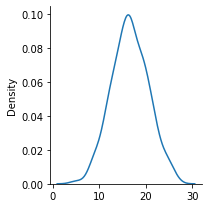

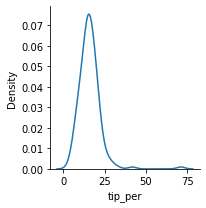

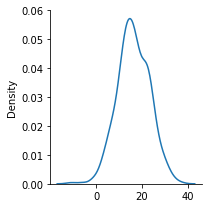

In [82]:
from seaborn import displot
displot(data=lunch, kind='kde', height=3)
displot(x=theoretical_l, kind='kde', height=3)


from seaborn import displot
displot(data=dinner, kind='kde', height=3)
displot(x=theoretical_d, kind='kde', height=3)

---
**Problem 5**

Is there a difference in people's spending habit between weekends and weekdays?

Is this difference statistically significant?

Do your analyses numerically and visually. Explain why your choice of statistical test of difference.




### Answer:

1. There is a certain difference in people's spending habit between weekends and weekdays. As we can observe from the displot graph that spendings on weekends is more that spendings on weekdays

2. According to Mann-Whitney test yields statistic approximately 8193.0 and having pvalue of 0.0022. We can see that p-value is less than 0.05 indicating that the difference in people's spending habits between weekends and weekdays is statistically significant.

In [87]:
def categorize(day):
    if day in ['Sat', 'Sun']:
        return 'Weekend'
    else:
        return 'Weekday'

tips['spending']=tips['day'].apply(categorize)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_per,spending
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,Weekend
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,Weekend
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,Weekend
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,Weekend
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,Weekend
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,Weekend
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,Weekend
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,Weekend
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,Weekend


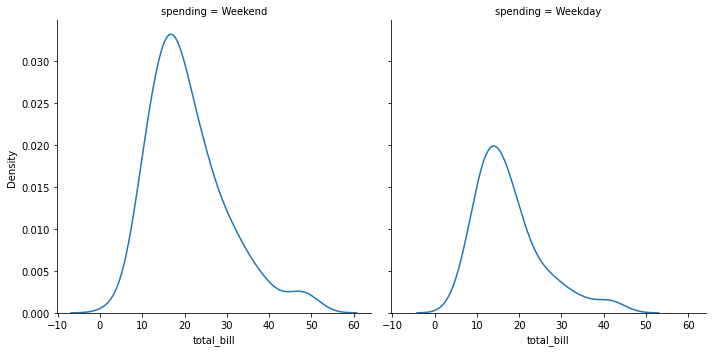

In [90]:
seaborn.displot(data=tips, x='total_bill', col='spending', kind='kde', height=5)

In [91]:
weekend=tips[tips['spending']=='Weekend']['total_bill']
weekday=tips[tips['spending']=='Weekday']['total_bill']

In [96]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    shapiro_test = shapiro(weekend)
    fig = qqplot(weekend, line='s')
    return round(shapiro_test.statistic,4)


0.9289

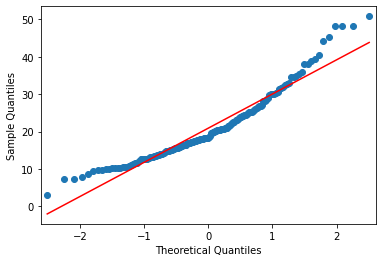

In [97]:
test_for_normality(tips['day'])

0.8904

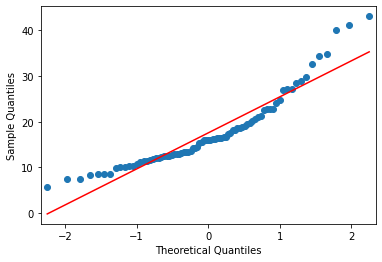

In [98]:
def test_for_normality(data):
    shapiro_test = shapiro(weekday)
    fig = qqplot(weekday, line='s')
    return round(shapiro_test.statistic,4)

test_for_normality(tips['day'])

In [99]:
from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(weekend)
print(round(test_pvalue,4))

from scipy.stats import shapiro
test_statistics, test_pvalue = shapiro(weekday)
print(round(test_pvalue,4))

0.0
0.0


In [102]:
from scipy.stats import ttest_ind, mannwhitneyu

m=mannwhitneyu(weekend, weekday)
print (m)

MannwhitneyuResult(statistic=8193.0, pvalue=0.0021811983673292804)
